# Time Series Analysis and Forecasting with Prophet

## 0- Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

#times series
from fbprophet import Prophet

## 1- Read data

In [22]:
df = pd.read_csv('train.csv', parse_dates=True, date_parser= ['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [23]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [24]:
df.shape

(1017209, 9)

In [25]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

## 2- Data Prep

In [26]:
# filtrar las tiendas sin ventas
df1 = df[(df['Store']!=0) & (df['Sales']!=0)]

In [28]:
# sales for the store number 1 (StoreType C)
sales = df1[df1['Store']==1][['Date', 'Sales']]
sales['Date'] = pd.to_datetime(sales['Date'])
sales.head()

,Date,Sales
0,2015-07-31,5263
1115,2015-07-30,5020
2230,2015-07-29,4782
3345,2015-07-28,5011
4460,2015-07-27,6102


In [96]:
sales = sales.sort_index(ascending = False)
sales.tail(7)

,ds,y
7805,2015-07-24,3706
6690,2015-07-25,4364
4460,2015-07-27,6102
3345,2015-07-28,5011
2230,2015-07-29,4782
1115,2015-07-30,5020
0,2015-07-31,5263


In [29]:
sales.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [30]:
sales.columns = ['ds', 'y']
sales.head()

,ds,y
0,2015-07-31,5263
1115,2015-07-30,5020
2230,2015-07-29,4782
3345,2015-07-28,5011
4460,2015-07-27,6102


In [100]:
sales.tail(7)

,ds,y
7805,2015-07-24,3706
6690,2015-07-25,4364
4460,2015-07-27,6102
3345,2015-07-28,5011
2230,2015-07-29,4782
1115,2015-07-30,5020
0,2015-07-31,5263


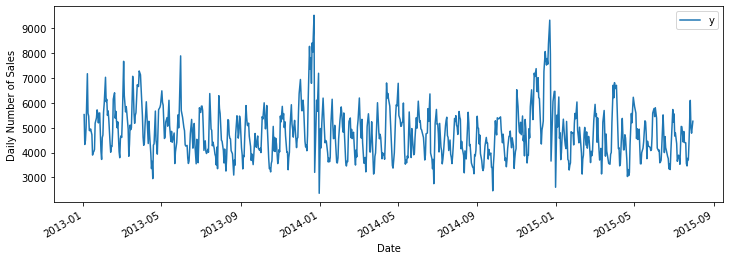

In [97]:
#plot ventas diarias
ax = sales.set_index('ds').plot(figsize = (12,4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

### Modeling Hollidays

In [34]:
df1['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [82]:
state_dates = df1[(df1['StateHoliday']!='0') & (df1['StateHoliday']!=0)]['Date'].values
school_dates =  df1[df1['SchoolHoliday']==1]['Date'].values

In [90]:
state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


### 3- Model

In [98]:
model = Prophet(interval_width=0.95, holidays=holidays, daily_seasonality=True)
model.fit(sales)

In [99]:
future_dates = model.make_future_dataframe(periods=6*7)
future_dates.tail(7)

,ds
816,2015-09-05
817,2015-09-06
818,2015-09-07
819,2015-09-08
820,2015-09-09
821,2015-09-10
822,2015-09-11


#### Predictions

In [101]:
forecast = model.predict(future_dates)

In [102]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
816,2015-09-05,4119.746365,2421.679040,5697.743435
817,2015-09-06,3856.831648,2222.435575,5532.710072
818,2015-09-07,4189.480523,2571.729167,5858.288203
819,2015-09-08,3692.099212,2076.459652,5377.091986
820,2015-09-09,3577.850079,2094.605496,5170.601228
821,2015-09-10,3490.581779,1862.614173,5193.796747
822,2015-09-11,3746.356089,2136.428750,5373.929994


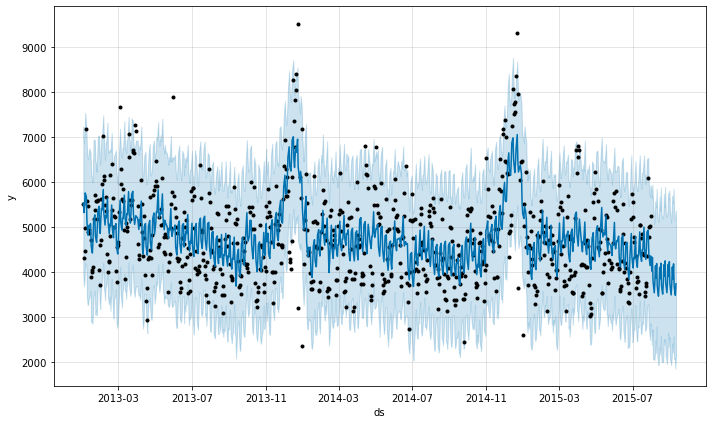

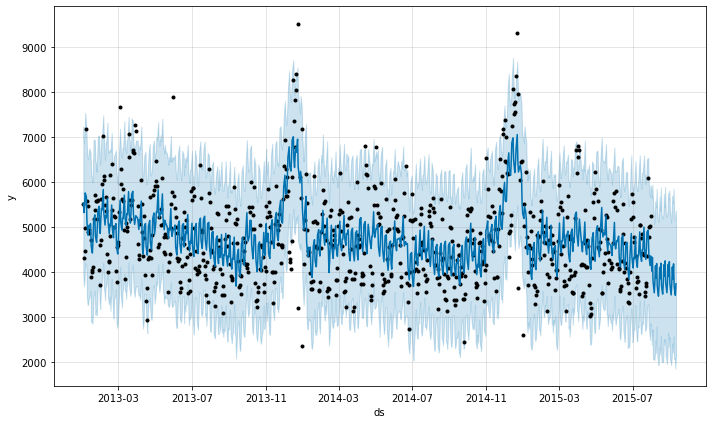

In [103]:
model.plot(forecast)

Prophet traza los valores observados de nuestra serie de tiempo (los puntos negros), los valores pronosticados (línea azul) y los intervalos de incertidumbre de nuestros pronósticos (las regiones sombreadas en azul).

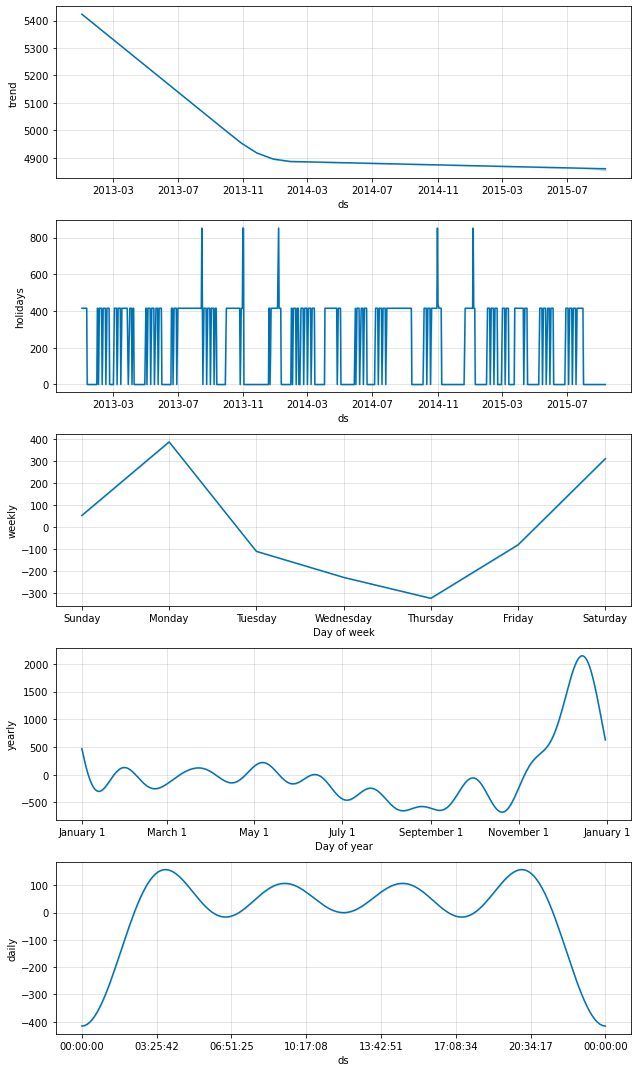

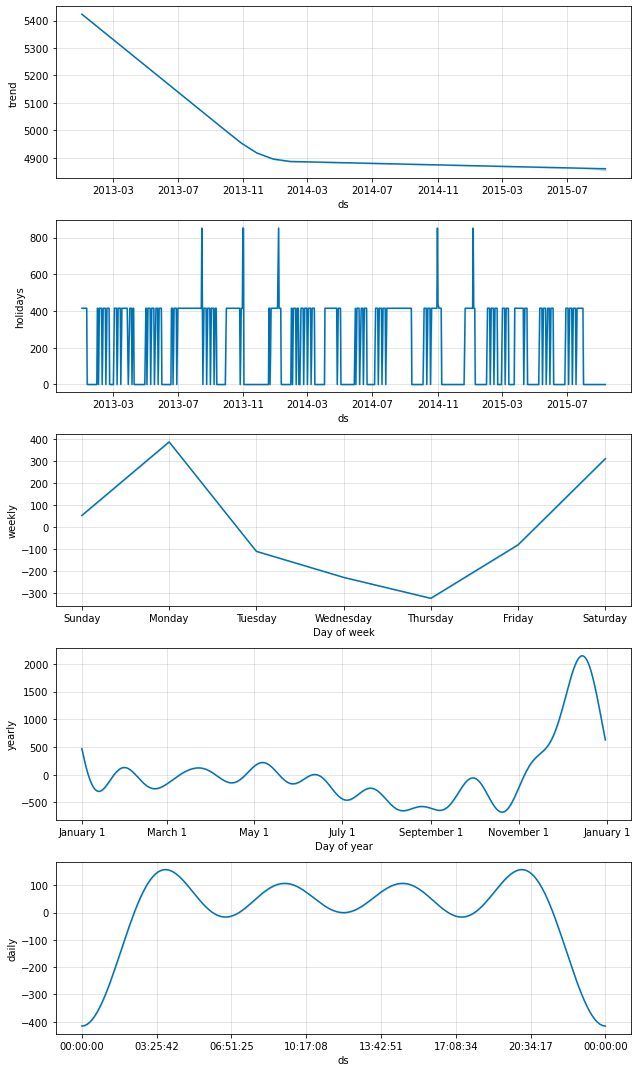

In [104]:
model.plot_components(forecast)

La primera gráfica muestra que las ventas mensuales de la tienda número 1 han ido disminuyendo linealmente con el tiempo y la segunda muestra las brechas de vacaciones incluidas en el modelo. El tercer gráfico destaca el hecho de que el volumen semanal de ventas de la semana pasada alcanza su punto máximo hacia el lunes de la semana siguiente, mientras que el cuarto gráfico muestra que la temporada de mayor actividad se produce durante las vacaciones de Navidad.

**Conclusión del pronóstico de series de tiempo**  
Durante esta parte, discutimos el análisis de series de tiempo con gráficos .seasonal_decompose (), ACF y PCF y ajustamos el modelo de pronóstico utilizando un nuevo procedimiento de Facebook Prophet.  

Ahora podemos presentar las principales ventajas e inconvenientes de la predicción de series de tiempo:  

Ventajas  

- Potente herramienta para el pronóstico de series de tiempo, ya que tiene en cuenta las dependencias del tiempo, las estaciones y los días festivos (Prophet: manualy).
- Se implementa fácilmente con R auto.arima () del paquete de pronóstico, que ejecuta una búsqueda de cuadrícula compleja y un - algoritmo sofisticado detrás de escena.  

Inconvenientes

- No detecta interacciones entre características externas, lo que podría mejorar el poder de pronóstico de un modelo. En nuestro caso, estas variables son Promo y CompetitionOpen.  
- Aunque Prophet ofrece una solución automatizada para ARIMA, esta metodología está en desarrollo y no es completamente estable. 
- El ajuste del modelo ARIMA estacional necesita de 4 a 5 temporadas completas en el conjunto de datos, lo que puede ser el mayor inconveniente para las nuevas empresas. 
- ARIMA estacional en Python tiene 7 hiperparámetros que solo se pueden ajustar manualmente, lo que afecta significativamente la velocidad del proceso de pronóstico